In [1]:
datafile ="../OriginData/Stroke/healthcare-dataset-stroke-data.csv"

In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os

In [3]:
df = pd.read_csv(datafile)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
label = ["stroke"]

In [5]:
len(df[df["stroke"]==1])

249

In [6]:
df = df.dropna()
df = df.drop(df[df["gender"]=="Other"].index)
df = df.drop(df[df["work_type"]=="Never_worked"].index)

In [7]:
df["gender"].value_counts()

Female    2886
Male      2000
Name: gender, dtype: int64

In [8]:
for col in df.select_dtypes(["object"]).columns:
    print(df[col].value_counts())

Female    2886
Male      2000
Name: gender, dtype: int64
Yes    3204
No     1682
Name: ever_married, dtype: int64
Private          2810
Self-employed     775
children          671
Govt_job          630
Name: work_type, dtype: int64
Urban    2475
Rural    2411
Name: Residence_type, dtype: int64
never smoked       1838
Unknown            1475
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64


In [9]:
# for col in df.columns:
# #     df.drop(df[df[i]=="Unknown"].index,inplace=True)
#     df[col] = LabelEncoder().fit_transform(df[col].values )

In [10]:
df.drop("id",axis=1,inplace=True)
df = df.reset_index(drop=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4881,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4882,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4883,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4884,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
onehotcol = []
con_col = []
for i in df.columns:
    print(i,len(np.unique(df[i].values)))
    if len(np.unique(df[i].values)) < 10 and len(np.unique(df[i].values)) > 1:
        onehotcol.append(i)
    elif len(np.unique(df[i].values)) >= 10:
        con_col.append(i)
        
# con_col = set(df.columns) - set(onehotcol)
print("con_col: ",con_col)
onehotcol.remove(label[0])
print("onehotcol: ",onehotcol)

gender 2
age 104
hypertension 2
heart_disease 2
ever_married 2
work_type 4
Residence_type 2
avg_glucose_level 3839
bmi 418
smoking_status 4
stroke 2
con_col:  ['age', 'avg_glucose_level', 'bmi']
onehotcol:  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [12]:
Cols = [["D",len(np.unique(df[i].values))] for i in onehotcol]
Cols.append(["C",len(con_col)])
print(Cols)

[['D', 2], ['D', 2], ['D', 2], ['D', 2], ['D', 4], ['D', 2], ['D', 4], ['C', 3]]


In [13]:
df_cols = con_col+onehotcol+label

In [14]:
df_ori =df[df_cols]

In [15]:
df_onehot = df[onehotcol]
df_con = df[con_col]
# label = ["y"]
y = df[label]

In [16]:
for col in onehotcol:
    df[col] = LabelEncoder().fit_transform(df[col].values )
#     df.loc[:, col] = LabelEncoder().fit_transform(df[col].values)
df_onehot = df[onehotcol]
df_onehot

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,1,0,1,1,1,1,1
1,1,0,1,1,1,0,2
2,0,0,0,1,1,1,3
3,0,1,0,1,2,0,2
4,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...
4881,0,0,0,0,3,0,0
4882,0,0,0,1,2,1,2
4883,0,0,0,1,2,0,2
4884,1,0,0,1,1,0,1


## 对离散多标签数据进行one-hot

In [17]:
from sklearn.preprocessing import OneHotEncoder
# 创建 OneHotEncoder 对象
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
# 对指定列进行 One-Hot 编码
encoded_data = encoder.fit_transform(df_onehot)
# 获取编码后的特征名称
feature_names = encoder.get_feature_names_out(input_features=onehotcol)
# 创建编码结果的 DataFrame，并设置特征名称
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
encoded_df

/home/amax/.conda/envs/pytorch/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_0,gender_1,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_0,ever_married_1,work_type_0,work_type_1,work_type_2,work_type_3,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4882,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4883,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4884,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [18]:
restored_data = encoder.inverse_transform(encoded_data)
restored_df = pd.DataFrame(restored_data, columns=onehotcol)

In [19]:
exam = pd.DataFrame([])
for i in list(restored_df):
    exam[i] = restored_df[i]-df_onehot[i]
#判断还原矩阵df和原始矩阵df_ori是否相同或近似相同
np.isclose(exam,0).all()
#True 表示成功还原，还原矩阵和原矩阵几乎完全一样

True

In [20]:
# for i in onehotcol:
#     df =df.join(pd.get_dummies(df[i],prefix=i))

# df

In [21]:
# df.drop(onehotcol,axis=1,inplace=True)
# df 

In [22]:
# columns = list(df.columns[3:]) +list(df.columns[:3])
# df = df[columns]
# df  

## 连续值进行min-max

In [23]:
# df_con
max_items = df_con.max()
min_items = df_con.min()
df_con_norm = (df_con-df_con.min())/(df_con.max()-df_con.min())
df_con_norm

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
1,0.975586,0.234512,0.254296
2,0.597168,0.536008,0.276060
3,0.963379,0.549349,0.156930
4,0.987793,0.605161,0.214204
...,...,...,...
4881,0.157715,0.221402,0.095074
4882,0.987793,0.323516,0.340206
4883,0.426270,0.128658,0.232532
4884,0.621582,0.513203,0.175258


In [24]:
df_= pd.concat([encoded_df, df_con_norm, y], axis=1).reset_index(drop=True)

In [25]:
encoded_df.shape

(4886, 18)

In [26]:
np.random.seed(1234)
header = list(df_)
values = df_.values

In [27]:
#保存预处理后（onehot、min-max）的数据，7:3分层划分训练集测试集
train,test =train_test_split(values,test_size=0.3,stratify = df_[label])
np.save("Stroke/stroke_train",train)
np.save("Stroke/stroke_test",test)
np.save("Stroke/stroke_header",header)

np.save("/home/amax/Documents/Seagate4T/GAN/fanshishi/data/SynData/onehot_Binary_stroke/stroke_train.npy",train)
np.save("/home/amax/Documents/Seagate4T/GAN/fanshishi/data/SynData/onehot_Binary_stroke/stroke_test.npy",test)

In [28]:
# train.shape

In [29]:
train.shape

(3420, 22)

In [30]:
test.shape

(1466, 22)

## 数据还原

In [31]:
pre_columns = list(df_)
storage_path = "../SynData/onehot_Binary_stroke/syndata/"

In [32]:
LD = -1 
per = np.sum(values[:,LD] ==0)/len(values)
per

0.9572247237003684

In [33]:
def check_decimal(array):
    is_decimal = np.logical_and(array > 0, array < 1)  # 判断数组中是否在0-1之间
    return np.any(is_decimal)  # 判断是否存在满足条件的元素

def threshold_array(array, per):
    threshold = np.percentile(array, per*100)  # 根据占比per计算阈值
    result = np.where(array <= threshold, 0, 1).flatten().tolist()  # 小于等于阈值的位置标为0，大于阈值的位置标为1
    return result

def restore_fc(df=df,pre_columns=pre_columns,encoder=encoder,feature_names=feature_names,onehotcol=onehotcol,con_col=con_col,label=label,max_items=max_items,min_items=min_items):
    restored_data = encoder.inverse_transform(df[feature_names].values)
    restored_onehot = pd.DataFrame(restored_data, columns=onehotcol)
    restored_con =  pd.DataFrame([df[col]*(max_items[col]-min_items[col])+min_items[col] for col in con_col]).transpose()
#     y=pd.DataFrame({ label[0]: [0 if float(i) <float(per) else 1 for i in df[label].values] })
    if check_decimal(df[label].values):
        y=pd.DataFrame({ label[0]: threshold_array(df[label].values,per)})
    else:
        y=df[label]
    restored_df =pd.concat([restored_onehot, restored_con,y], axis=1).reset_index(drop=True)
    return restored_df

def exam_diff(df,restored_df):
    #判断还原矩阵df和原始矩阵df_ori是否相同或近似相同
    return np.isclose([df[i]-restored_df[i] for i in list(df)],0).all()
    #True 表示成功还原，还原矩阵和原矩阵几乎完全一样

In [34]:
# import re 

# recol = {}
# for i in onehotcol:
#     recol[i] = re.findall(f"{i}_\d+"," ".join(pre_columns))

In [35]:
# recol

In [36]:
df_train = pd.DataFrame(train,columns=pre_columns)
df_test = pd.DataFrame(test,columns=pre_columns)

In [37]:
restored_df_train = restore_fc(df_train)
restored_df_test = restore_fc(df_test)

In [38]:
# for k,v in recol.items():
#     df_train[k] = np.argmax(df_train[v].values,axis=1)
#     df_train.drop(v,inplace=True,axis=1)
    
#     df_test[k] = np.argmax(df_test[v].values,axis=1)
#     df_test.drop(v,inplace=True,axis=1)

In [39]:
restored_df_train

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi,stroke
0,0,0,0,1,1,1,2,30.0,116.98,26.0,0.0
1,0,0,0,1,0,0,2,77.0,190.32,31.4,1.0
2,1,0,0,1,1,1,0,52.0,247.69,35.1,0.0
3,0,0,0,1,1,0,3,38.0,79.83,27.9,0.0
4,0,0,0,0,1,1,0,16.0,58.02,22.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3415,0,0,0,1,0,1,1,32.0,101.13,43.9,0.0
3416,1,0,0,1,1,1,2,66.0,103.01,33.1,0.0
3417,1,0,0,1,1,0,1,63.0,57.82,28.8,0.0
3418,0,0,0,1,1,1,0,78.0,58.57,24.2,1.0


In [40]:
list(restored_df_train)

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'age',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [41]:
# order = ['age','avg_glucose_level','bmi','gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke',]
# df_train = df_train[order]
# df_test = df_test[order]
# df_train

In [42]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4881,0,13.0,0,0,0,3,0,103.08,18.6,0,0
4882,0,81.0,0,0,1,2,1,125.20,40.0,2,0
4883,0,35.0,0,0,1,2,0,82.99,30.6,2,0
4884,1,51.0,0,0,1,1,0,166.29,25.6,1,0


In [43]:
# restored_df

In [44]:
exam_diff(df,restore_fc(df_))

True

In [45]:
# np.save(storage_path+"stroke_train",restored_df_train.values)
# np.save(storage_path + "stroke_test",restored_df_test.values)

In [46]:
# for k,v in recol.items():
#     df[k] = np.argmax(df[v].values,axis=1)
#     df.drop(v,inplace=True,axis=1)

In [47]:
# for col in list(max_items.index):
#     df[col] = df[col]*(max_items[col]-min_items[col])+min_items[col]

In [48]:
# df

In [49]:
folder_path = '../SynData/onehot_Binary_stroke/'
filelist = [i for i in os.listdir(folder_path) if i.endswith("npy") and not i.startswith("cycleAE")]
for file_name in filelist:
    file_path = os.path.join(folder_path, file_name)
    print(file_path)
    data = np.load(file_path)
    df = pd.DataFrame(data,columns=pre_columns)
    restore = restore_fc(df).fillna(0)
    np.save(os.path.join(folder_path+ "syndata", file_name) ,restore.values)

../SynData/onehot_Binary_stroke/EMRWGantrainer.npy
../SynData/onehot_Binary_stroke/RGANtrainer.npy
../SynData/onehot_Binary_stroke/WGantrainer.npy
../SynData/onehot_Binary_stroke/EMR_RGANTrainer.npy
../SynData/onehot_Binary_stroke/EMR_cycleRGANConsistTrainer.npy
../SynData/onehot_Binary_stroke/MedWGantrainer.npy
../SynData/onehot_Binary_stroke/stroke_test.npy
../SynData/onehot_Binary_stroke/AE.npy
../SynData/onehot_Binary_stroke/GanTrainer.npy
../SynData/onehot_Binary_stroke/cycleRGANTrainer.npy
../SynData/onehot_Binary_stroke/MedGantrainer.npy
../SynData/onehot_Binary_stroke/cycleGANtrainer.npy
../SynData/onehot_Binary_stroke/RGAN_ncTrainer.npy
../SynData/onehot_Binary_stroke/cycleRGAN_ncTrainer.npy
../SynData/onehot_Binary_stroke/EMR_cycleRGANTrainer.npy
../SynData/onehot_Binary_stroke/MedBGantrainer.npy
../SynData/onehot_Binary_stroke/stroke_train.npy
../SynData/onehot_Binary_stroke/DPGantrainer.npy
../SynData/onehot_Binary_stroke/cycleRGANConsistTrainer.npy
../SynData/onehot_Binary

In [50]:
#判断还原矩阵df和原始矩阵df_ori是否相同或近似相同

In [51]:
#True 表示成功还原，还原矩阵和原矩阵几乎完全一样

In [52]:
########################################################################################################################
#以下代码用于将各种GAN模型生成的onehot-norm数据还原为原始尺度

In [53]:
# pre_columns

In [54]:
# data = np.load("../SynData/onehot_Binary_stroke/cycleRGAN_ncTrainer.npy")
# df = pd.DataFrame(data,columns=pre_columns)
# restore = restore_fc(df).fillna(0)
# has_null = restore.isnull().values.any()

# if has_null:
#     print("DataFrame contains null values.")
# else:
#     print("DataFrame does not contain null values.")

In [9]:
data.shape

(3420, 11)

Processing EMR-WGAN


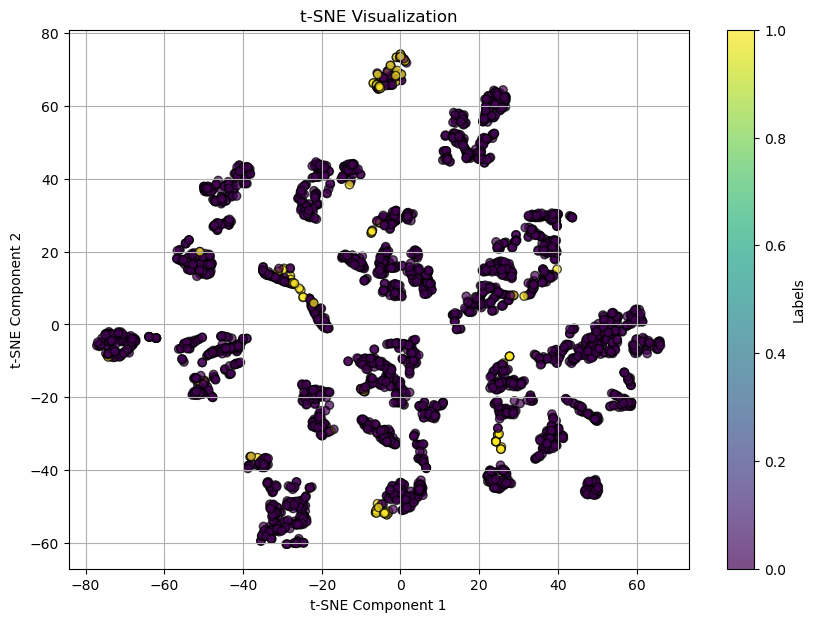

Processing WGAN


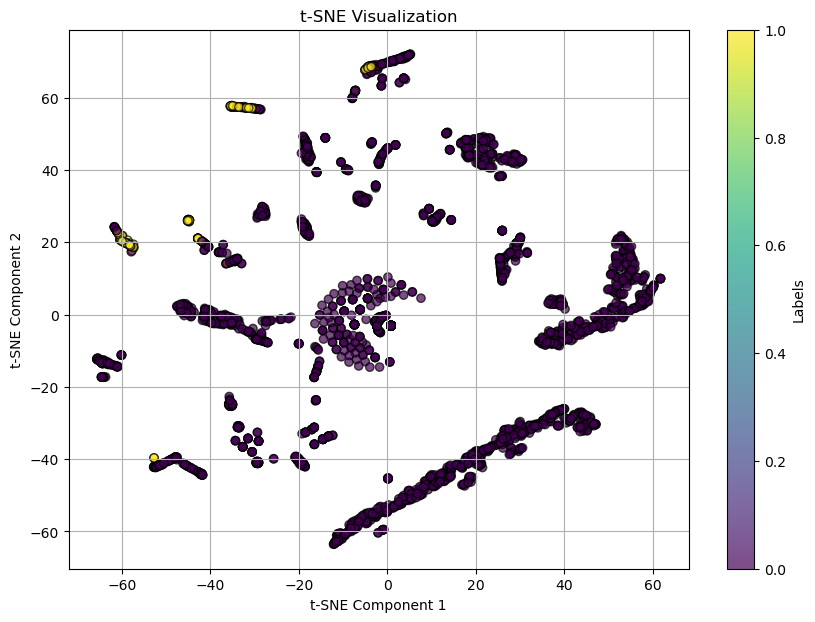

Processing GAN


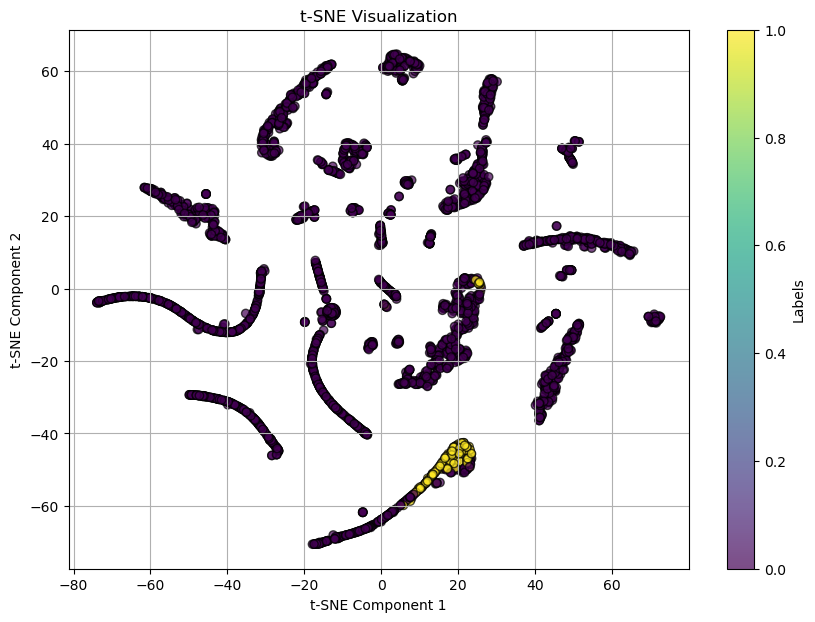

Processing CCR-GAN


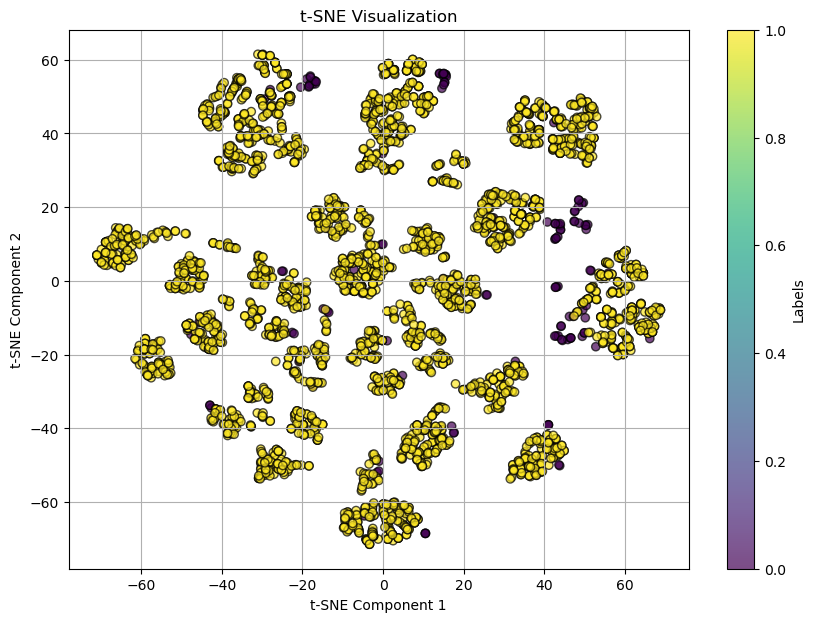

Processing medGAN


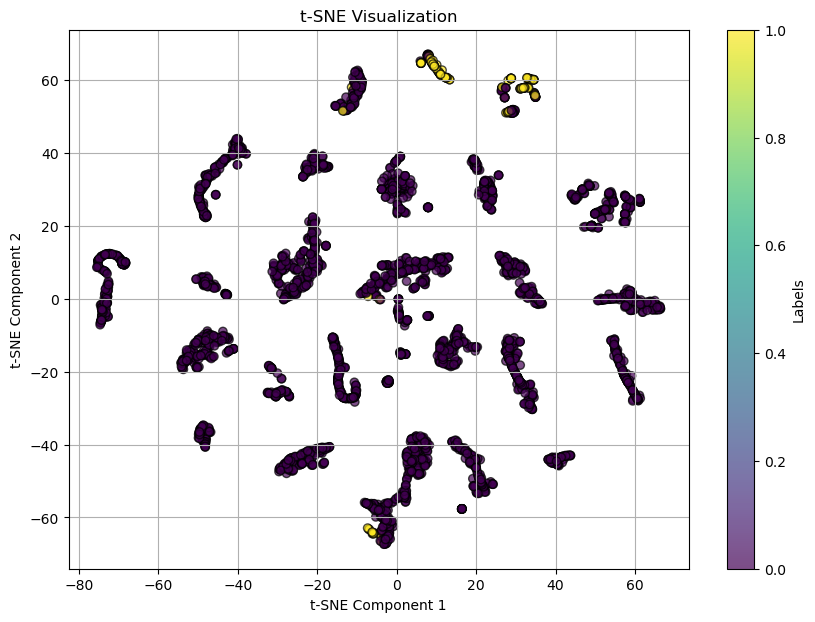

Processing Real dataset A


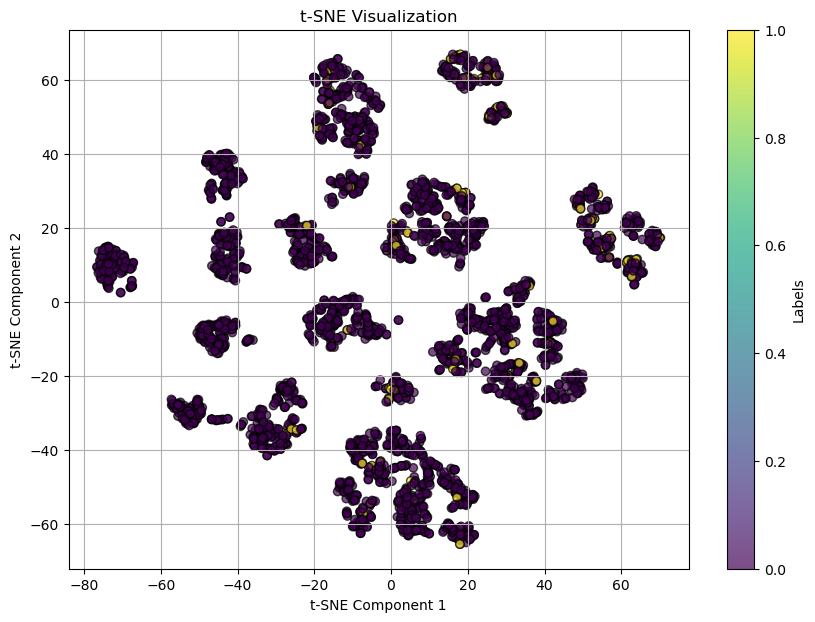

Processing DPGAN


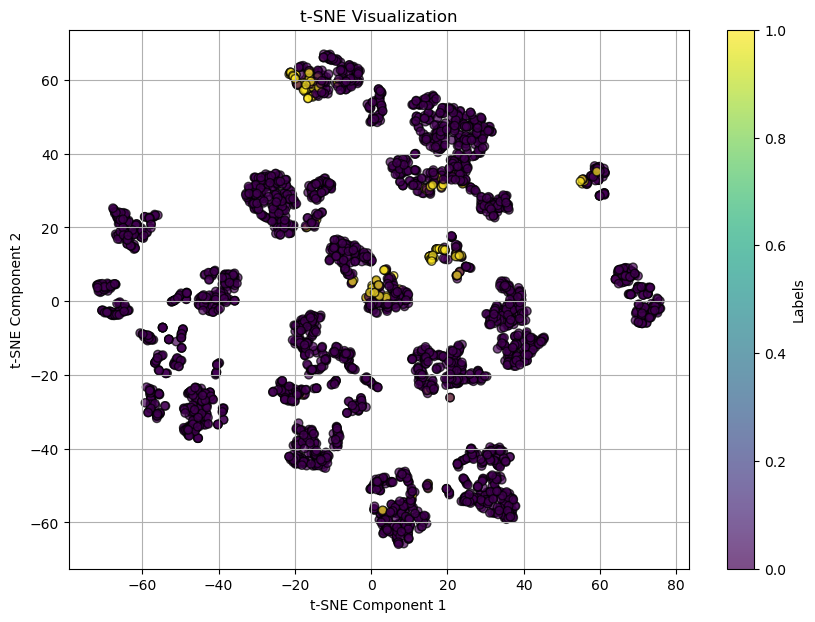

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

mapping = {'stroke_train.npy':'Real dataset A','DPGantrainer.npy':'DPGAN','EMRWGantrainer.npy':'EMR-WGAN','GanTrainer.npy':'GAN','MedGantrainer.npy':'medGAN','WGantrainer.npy':'WGAN','cycleRGANTrainer.npy':'CCR-GAN'}

# Set folder paths
f_path = '../SynData/onehot_Binary_stroke/syndata'

# Get list of files
filelist = [i for i in os.listdir(f_path) if i.endswith("npy") and not i.startswith("cycleAE")]
# print("filelist: ",filelist)
# Prepare data for t-SNE
all_data = []
file_names = []

for file_name in filelist:
    if file_name in mapping.keys():
        file_path = os.path.join(f_path, file_name)
        print(f'Processing {mapping[file_name]}')

        # Load data
        data = np.load(file_path)

        # 假设 data 的形状是 (n_samples, n_features + 1)
        # 分离特征和标签
        X = data[:, :-1]  # 特征数据
        y = data[:, -1]   # 标签数据

        # 标准化特征数据
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 应用 t-SNE
        tsne = TSNE(n_components=2, random_state=0)
        X_tsne = tsne.fit_transform(X_scaled)

        # 绘制 t-SNE 图
        plt.figure(figsize=(10, 7))
        scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
        plt.colorbar(scatter, label='Labels')
        plt.title('t-SNE Visualization')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.grid(True)
        plt.show()

Processing EMR-WGAN


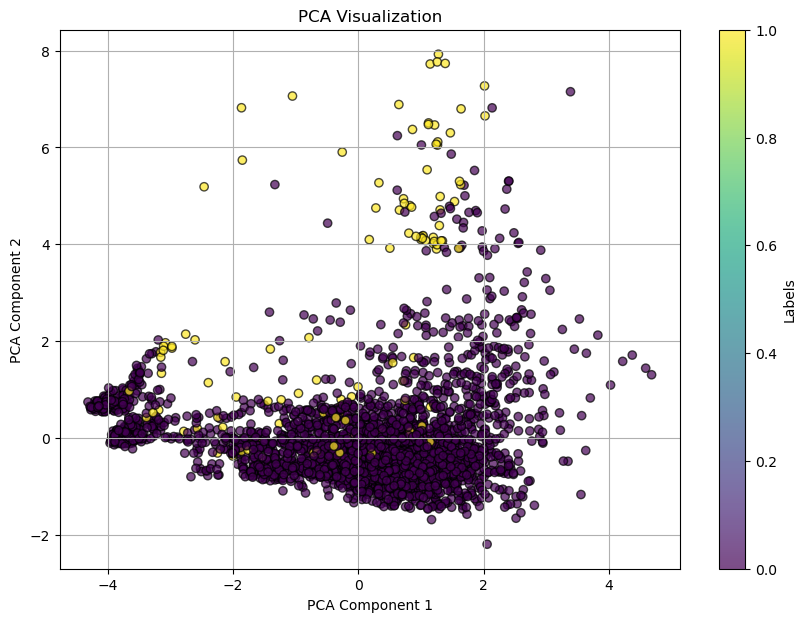

Processing WGAN


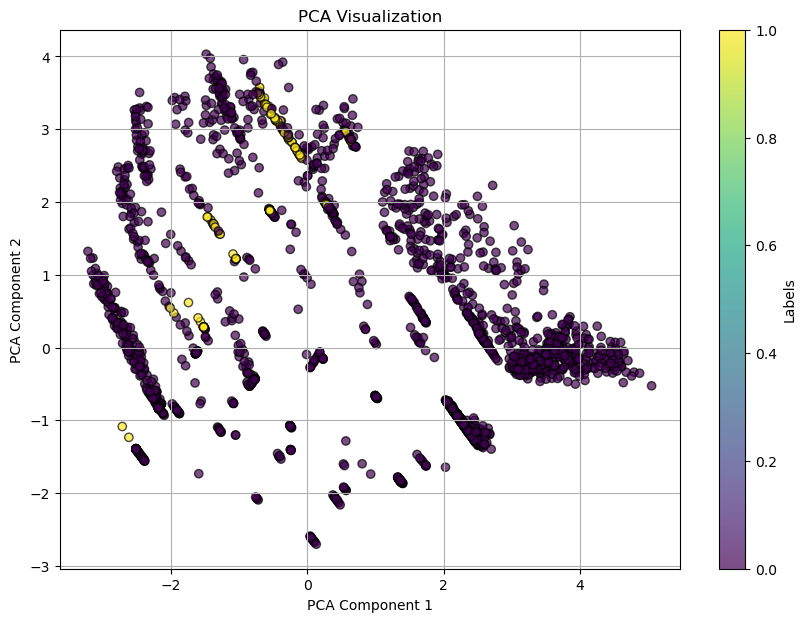

Processing GAN


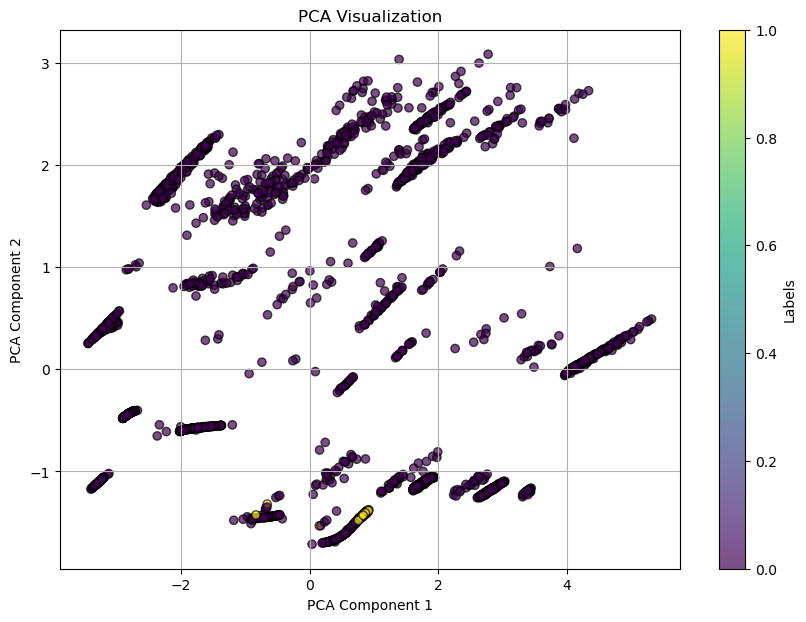

Processing CCR-GAN


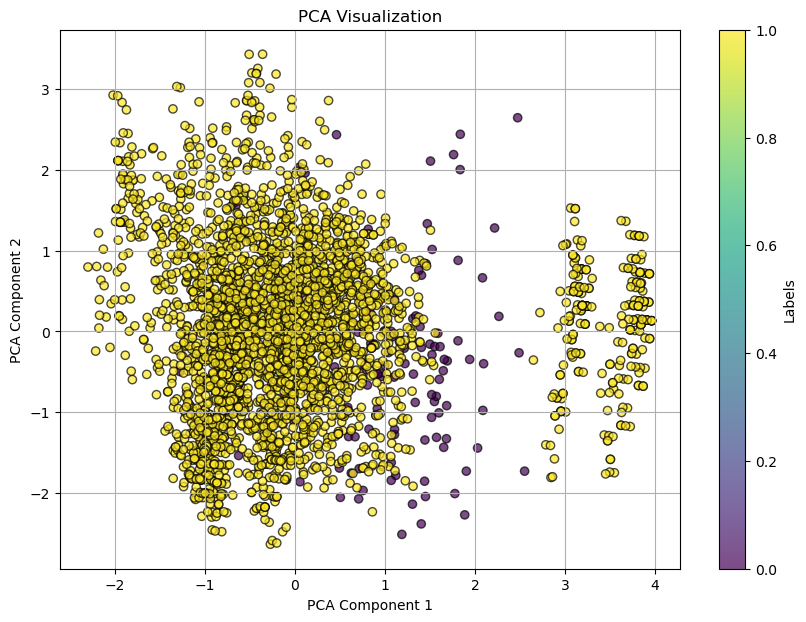

Processing medGAN


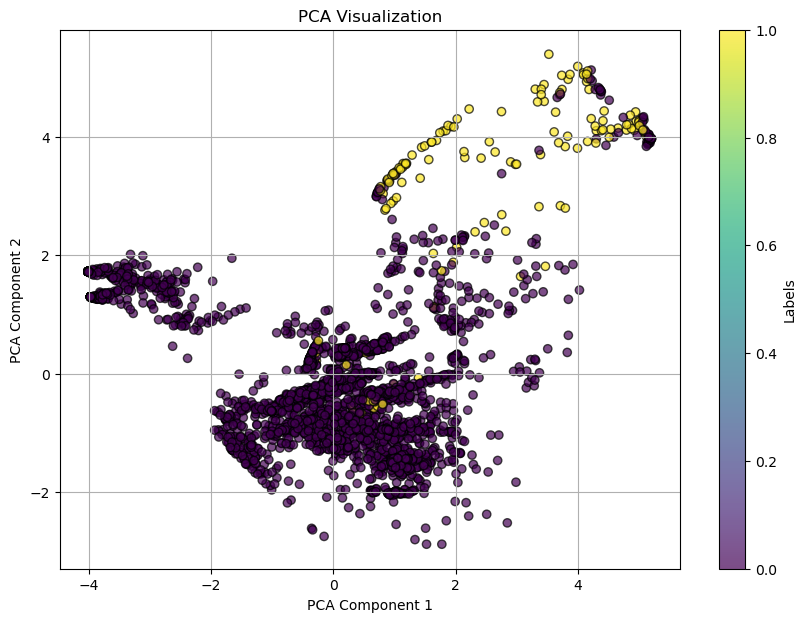

Processing Real dataset A


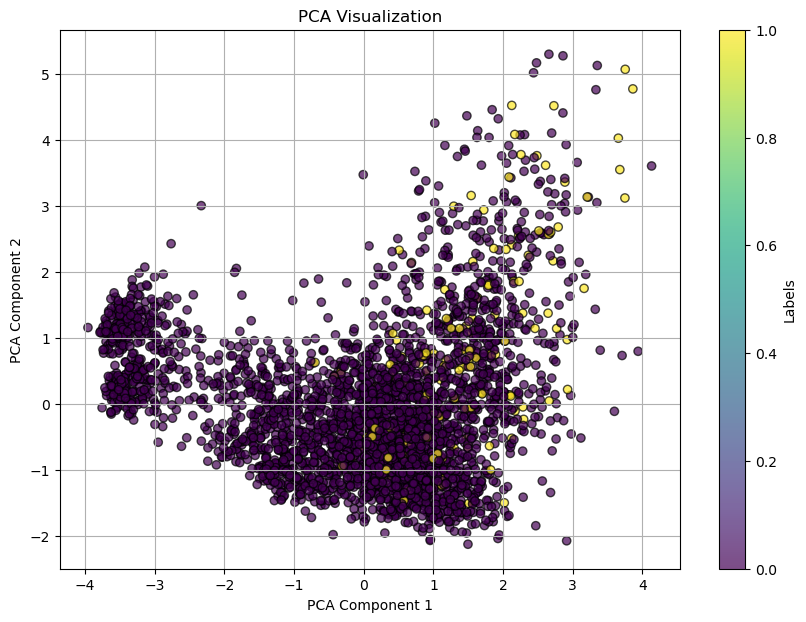

Processing DPGAN


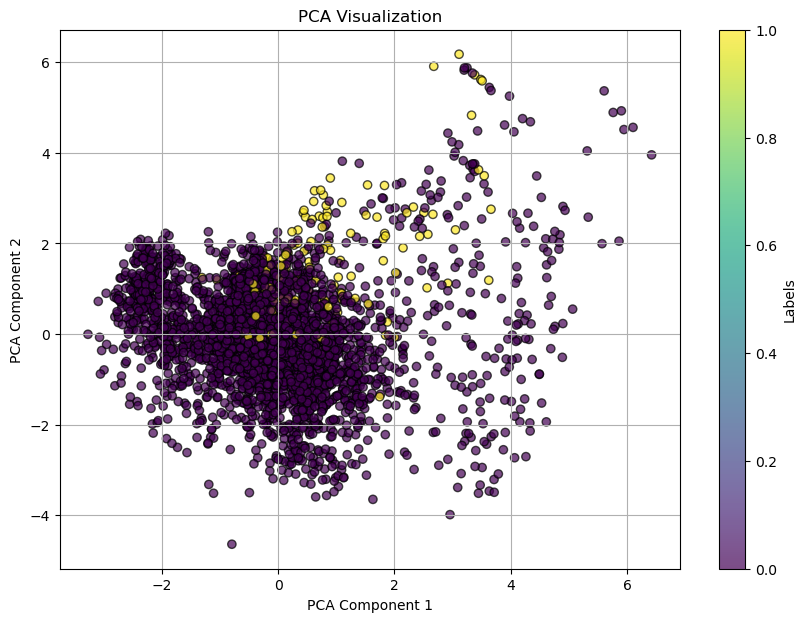

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set folder paths
f_path = '../SynData/onehot_Binary_stroke/syndata'

# Get list of files
filelist = [i for i in os.listdir(f_path) if i.endswith("npy") and not i.startswith("cycleAE")]
# print("filelist: ",filelist)
# Prepare data for t-SNE
all_data = []
file_names = []

for file_name in filelist:
    if file_name in mapping.keys():
        file_path = os.path.join(f_path, file_name)
        print(f'Processing {mapping[file_name]}')

        # Load data
        data = np.load(file_path)

        # 假设 data 的形状是 (n_samples, n_features + 1)
        # 分离特征和标签
        X = data[:, :-1]  # 特征数据
        y = data[:, -1]   # 标签数据

        # 标准化特征数据
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 应用 PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        # 绘制 PCA 图
        plt.figure(figsize=(10, 7))
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
        plt.colorbar(scatter, label='Labels')
        plt.title('PCA Visualization')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.grid(True)
        plt.show()